# Real Estate Linear analysis

The dataset being analysed has drug utilization and reimbursement details. each record represent unique drug utilization.Below are the columns.

#### Contents Variable Definitions .


Monthly Mortgage and Owner Costs 
Monthly Owner Costs 
Gross Rent 
Household Income 
Family Income 

#### Location fields Definitions 
````````````````````````
1. id 
2. State_Code
3. State_Name 
4. State_ab 
5. Country
6. City 
7. Place 
8. Type 
9. Primary
10. Zip Code 
11. Area Code
12. ALand
13. AWater
14. Lat 
15. Lon

#### Statistic fields Definitions 

1. morgages_ocsts_median 
2. morgages_ocsts_mean 
3. morgages_ocsts_stdev 
4. morgages_csts_samples
5. owner_cost_mean
6. owner_cost_median 
7. owner_cost_stdev
8. owner_cost_samples
9. gross_rent_mean 
10. gross_rent_median
11. gross_rent_stdev 
12. gross_rent_samples 
13. family_income_mean 
14. family_income_median
15. family_income_stdev
16. family_income_families
17. household_income_mean
18. household_income_median
19. household_income_stdev 
20. household_income_wsum

For my analysis I am considering data with Numercal continuous variables which are below. 

1. morgages_csts_samples
2. family_income_families
3. Primary
4. Family_Income_Mean
5. gross_rent_samples 

Let's do some exploratory data analysis before proceeding for building models.

In [1]:
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import random
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats 
from sklearn.linear_model import LogisticRegression


from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)


import pandas as pd
ten=pd.read_csv("F://ADS//Assignment//kaggle_sample.csv",encoding='latin-1')
ten.head()

C:\Users\Balaji\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Balaji\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,...,morgages_ocsts_stdev,morgages_csts_samples,owner_cost_mean,owner_cost_median,owner_cost_stdev,owner_cost_samples,household_income_mean,household_income_median,household_income_stdev,household_income_wsum
0,1022242,1,Alabama,AL,Autauga County,Abbeville,Autaugaville,Track,1,36310,...,414,122,376,336,180,227,33783,20735,31691,379
1,1022757,1,Alabama,AL,Autauga County,Adamsville,Autaugaville,Track,1,35005,...,565,59,392,434,147,87,74200,56355,50759,109
2,1021047,1,Alabama,AL,Autauga County,Alabaster,Autaugaville,Track,1,35007,...,663,674,450,436,155,334,99615,90500,52440,378
3,1021057,1,Alabama,AL,Autauga County,Alabaster,Autaugaville,Track,1,35007,...,847,798,487,457,180,204,92589,300000,65017,556
4,1024276,1,Alabama,AL,Autauga County,Alabaster,Autaugaville,Track,1,35007,...,566,977,578,568,226,299,114805,110344,67381,454


In [2]:
ten = ten.rename(columns={'State_Code': 'State Code' , 'State_Name':'State Name', 'Zip_Code':'Zip Code', 'family_income_mean':'Family Income Mean', 'family_income_median':'Family Income Median'      })
ten.describe()

,id,State Code,Primary,Zip Code,Area_Code,ALand,AWater,Lat,Lon,Family Income Mean,...,morgages_ocsts_stdev,morgages_csts_samples,owner_cost_mean,owner_cost_median,owner_cost_stdev,owner_cost_samples,household_income_mean,household_income_median,household_income_stdev,household_income_wsum
count,2.111000e+04,21110.000000,21110.000000,21110.000000,21110.000000,2.111000e+04,2.111000e+04,21110.000000,21110.000000,21110.000000,...,21110.000000,21110.000000,21110.000000,21110.000000,21110.000000,21110.000000,21110.000000,21110.000000,21110.000000,21110.000000
mean,5.208436e+07,28.413216,0.708764,50114.869162,586.717906,9.489159e+07,6.127364e+06,37.847008,-91.276561,73882.641450,...,525.848839,528.218427,496.042539,476.245476,182.308622,283.495073,64576.503411,83067.172099,46013.249455,762.659403
std,9.990681e+07,16.432006,0.454343,28503.570682,233.305534,1.199209e+09,2.235751e+08,5.660113,15.808573,33459.598723,...,271.757159,2066.581065,245.746896,259.917835,97.200608,970.349082,29703.508244,86963.203189,16626.574743,3348.661735
min,1.022000e+03,1.000000,0.000000,601.000000,201.000000,0.000000e+00,0.000000e+00,17.942626,-168.923151,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.402725e+06,13.000000,0.000000,28112.000000,389.750000,1.983003e+06,0.000000e+00,34.022939,-97.391218,52001.000000,...,342.000000,92.000000,355.000000,329.000000,122.000000,60.000000,45027.750000,35358.000000,35210.000000,181.000000
50%,2.602329e+07,29.000000,1.000000,48188.500000,607.000000,5.227466e+06,2.296800e+04,38.926899,-87.581273,68036.000000,...,493.000000,209.000000,443.000000,416.000000,170.000000,128.000000,58553.500000,50026.000000,44777.500000,325.000000
75%,4.701112e+07,42.000000,1.000000,75151.500000,787.000000,2.445656e+07,4.112888e+05,41.527182,-80.170285,90358.500000,...,702.000000,452.000000,587.000000,559.000000,233.000000,261.000000,78843.000000,77083.500000,56361.500000,638.000000
max,4.802211e+08,72.000000,1.000000,99950.000000,989.000000,9.163267e+10,2.453228e+10,68.064411,-65.480726,242857.000000,...,1871.000000,101316.000000,1557.000000,1563.000000,674.000000,48401.000000,242857.000000,300000.000000,113936.000000,153525.000000


In [3]:
ten.tail()

,id,State Code,State Name,State_ab,County,City,Place,Type,Primary,Zip Code,...,morgages_ocsts_stdev,morgages_csts_samples,owner_cost_mean,owner_cost_median,owner_cost_stdev,owner_cost_samples,household_income_mean,household_income_median,household_income_stdev,household_income_wsum
21105,5601382,56,Wyoming,WY,Sweetwater County,Rock Springs,Purple Sage,CDP,0,82902,...,278,56,649,649,37,36,47034,50005,28922,139
21106,5601362,56,Wyoming,WY,Teton County,Wilson,Moose Wilson Road,CDP,0,83014,...,1121,231,1101,1283,534,298,93210,300000,75079,365
21107,5601392,56,Wyoming,WY,Uinta County,Mountain View,Robertson,CDP,0,82939,...,0,0,935,967,317,62,140397,300000,67635,22
21108,5601432,56,Wyoming,WY,Washakie County,Worland,Worland city,City,0,82401,...,401,913,338,344,115,678,54187,40032,46001,1525
21109,5601322,56,Wyoming,WY,Weston County,Newcastle,Hill View Heights,CDP,0,82701,...,183,8,532,536,50,32,86993,300000,16547,10


In [4]:
print(ten.apply(lambda x : sum(x.isnull()),axis = 0))

id                         0
State Code                 0
State Name                 0
State_ab                   0
County                     0
City                       0
Place                      0
Type                       0
Primary                    0
Zip Code                   0
Area_Code                  0
ALand                      0
AWater                     0
Lat                        0
Lon                        0
Family Income Mean         0
Family Income Median       0
family_income_stdev        0
family_income_families     0
gross_rent_mean            0
gross_rent_median          0
gross_rent_stdev           0
gross_rent_samples         0
morgages_ocsts_mean        0
morgages_ocsts_median      0
morgages_ocsts_stdev       0
morgages_csts_samples      0
owner_cost_mean            0
owner_cost_median          0
owner_cost_stdev           0
owner_cost_samples         0
household_income_mean      0
household_income_median    0
household_income_stdev     0
household_inco

In [5]:
ten.corr()

,id,State Code,Primary,Zip Code,Area_Code,ALand,AWater,Lat,Lon,Family Income Mean,...,morgages_ocsts_stdev,morgages_csts_samples,owner_cost_mean,owner_cost_median,owner_cost_stdev,owner_cost_samples,household_income_mean,household_income_median,household_income_stdev,household_income_wsum
id,1.000000,0.276281,0.196031,-0.029900,0.036681,-0.008619,-0.007774,-0.087644,0.090423,0.044681,...,-0.006403,-0.053483,0.108258,0.110749,0.042398,-0.053864,0.052193,0.072413,0.035442,-0.046224
State Code,0.276281,1.000000,-0.064320,-0.209358,0.092051,-0.025270,-0.021222,0.101370,0.267418,-0.043556,...,-0.103472,-0.021251,0.017604,0.021112,-0.025156,-0.001922,-0.049274,-0.004643,-0.071060,-0.012325
Primary,0.196031,-0.064320,1.000000,-0.054624,-0.007870,0.041318,0.014194,-0.095204,0.046256,0.115116,...,0.155078,-0.148453,0.132297,0.131196,0.057237,-0.156766,0.124676,0.016721,0.145590,-0.136708
Zip Code,-0.029900,-0.209358,-0.054624,1.000000,0.021151,0.055864,0.024375,-0.017621,-0.914913,-0.039848,...,-0.050790,0.026060,-0.210728,-0.207689,-0.086504,0.007542,-0.018177,0.016028,-0.045280,0.016098
Area_Code,0.036681,0.092051,-0.007870,0.021151,1.000000,0.017423,0.016971,-0.088724,-0.033318,0.010196,...,0.032960,0.003519,0.041684,0.040924,0.011230,-0.000379,0.020361,0.022350,0.008942,-0.002343
ALand,-0.008619,-0.025270,0.041318,0.055864,0.017423,1.000000,0.550267,0.078214,-0.089051,-0.016440,...,0.009176,0.000313,-0.022992,-0.024318,0.014912,0.008215,-0.015791,-0.020645,-0.002623,0.002440
AWater,-0.007774,-0.021222,0.014194,0.024375,0.016971,0.550267,1.000000,0.055300,-0.052717,-0.012044,...,0.000300,0.002426,-0.011038,-0.012352,0.003289,0.006002,-0.010902,-0.010181,-0.010874,0.003807
Lat,-0.087644,0.101370,-0.095204,-0.017621,-0.088724,0.078214,0.055300,1.000000,-0.058566,0.145241,...,0.049645,-0.010072,0.180382,0.175024,0.061118,-0.053000,0.129339,0.093292,0.096869,-0.032822
Lon,0.090423,0.267418,0.046256,-0.914913,-0.033318,-0.089051,-0.052717,-0.058566,1.000000,-0.007217,...,-0.022093,-0.026583,0.159961,0.158274,0.054931,-0.000393,-0.030464,-0.042690,-0.003493,-0.014146
Family Income Mean,0.044681,-0.043556,0.115116,-0.039848,0.010196,-0.016440,-0.012044,0.145241,-0.007217,1.000000,...,0.626183,0.091785,0.671007,0.648056,0.484277,0.039943,0.952255,0.440340,0.869341,-0.001620


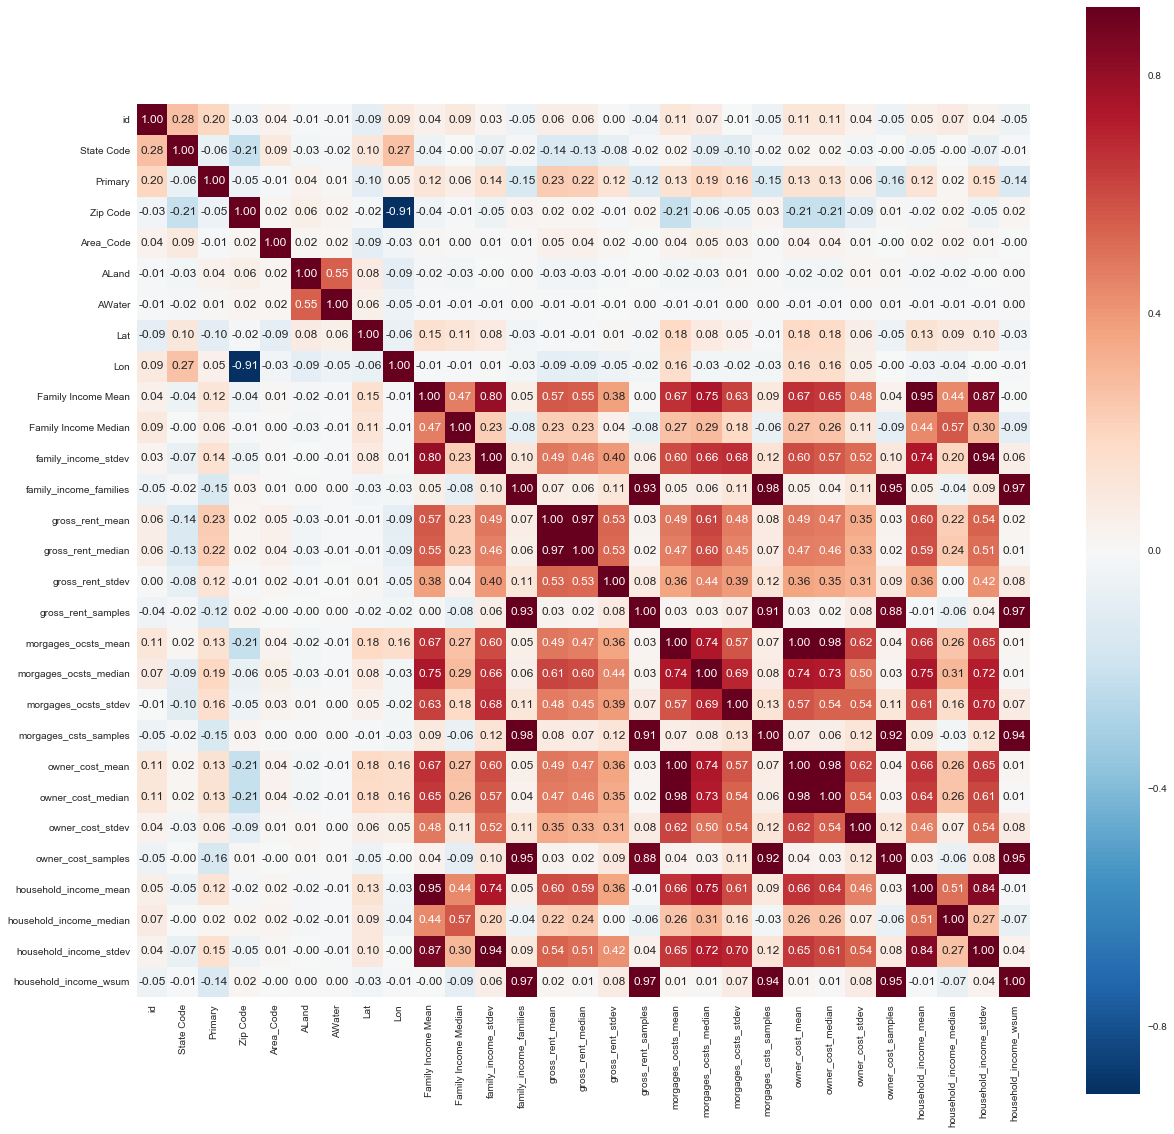

In [6]:
fig, ax = plt.subplots(figsize=(20,20))  

sns.heatmap(ten.corr(), vmax= 0.8, square = True, annot = True , fmt = '.2F',ax=ax)

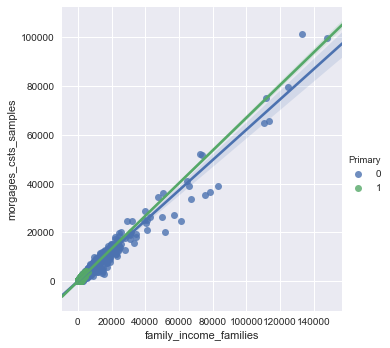

In [7]:
sns.lmplot(y="morgages_csts_samples", x="family_income_families", data=ten,  hue="Primary")
sns.plt.show()

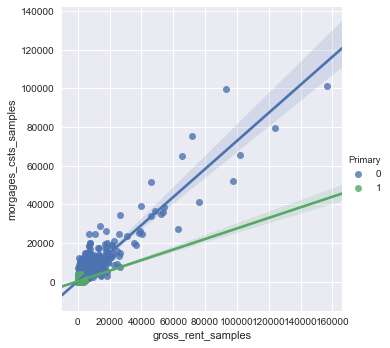

In [8]:
sns.lmplot(y="morgages_csts_samples", x="gross_rent_samples", data=ten,  hue="Primary")
sns.plt.show()

In [9]:
from sklearn import linear_model 
X = ten[["gross_rent_samples"]]
Y = ten[["morgages_csts_samples"]]
model = linear_model.LinearRegression()
results = model.fit(X,Y)
m = results.coef_
print(results.coef_)
b = results.intercept_
print(results.intercept_)

[[ 0.72390459]]
[ 186.62273169]


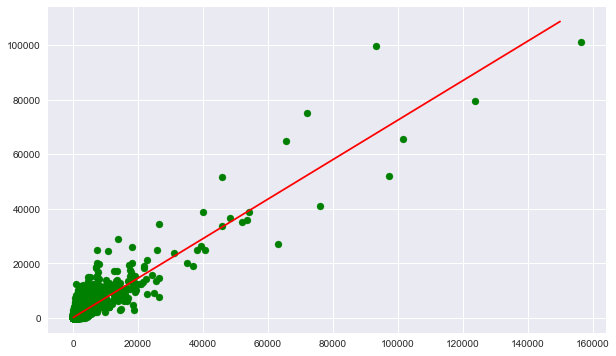

In [10]:
plt.scatter(X,Y,color = "green")
plt.plot([0,150000],[b, m*150000 +b],'r')

In [11]:
X1 = ten[["gross_rent_samples"]]
Y1 = ten[["morgages_csts_samples"]]
model = linear_model.LinearRegression()
results = model.fit(X,Y)
m = results.coef_
print(results.coef_)
b = results.intercept_
print(results.intercept_)

[[ 0.72390459]]
[ 186.62273169]


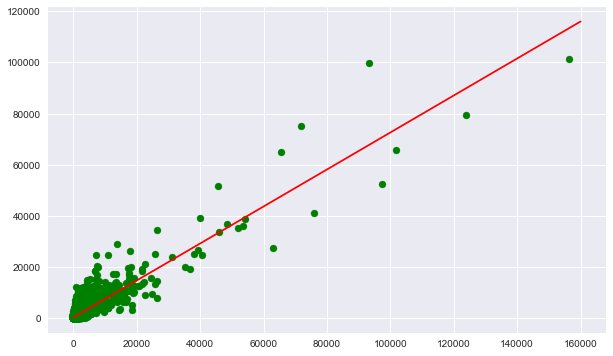

In [12]:
plt.scatter(X1,Y1,color = "green")
plt.plot([0,160000],[b, m*160000 +b],'r')

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model= ols("morgages_csts_samples ~ family_income_families + gross_rent_samples -1", data = ten).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     morgages_csts_samples   R-squared:                       0.968
Model:                               OLS   Adj. R-squared:                  0.968
Method:                    Least Squares   F-statistic:                 3.144e+05
Date:                   Wed, 18 Oct 2017   Prob (F-statistic):               0.00
Time:                           22:42:36   Log-Likelihood:            -1.5560e+05
No. Observations:                  21110   AIC:                         3.112e+05
Df Residuals:                      21108   BIC:                         3.112e+05
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
family_income_families     0.6407      0.002    293.047      0.000       0.636       0.645
gross_rent_samples        -0.0258      0.003     -9.276      0.000      -0.031      -0.020
==============================================================================
Omnibus:                    15523.310   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        413446501.129
Skew:                          -1.581   Prob(JB):                         0.00
Kurtosis:                     688.593   Cond. No.                         5.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model1= ols("morgages_csts_samples ~ family_income_families -1", data = ten).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     morgages_csts_samples   R-squared:                       0.967
Model:                               OLS   Adj. R-squared:                  0.967
Method:                    Least Squares   F-statistic:                 6.261e+05
Date:                   Wed, 18 Oct 2017   Prob (F-statistic):               0.00
Time:                           22:42:36   Log-Likelihood:            -1.5564e+05
No. Observations:                  21110   AIC:                         3.113e+05
Df Residuals:                      21109   BIC:                         3.113e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
family_income_families     0.6218      0.001    791.261      0.000       0.620       0.623
==============================================================================
Omnibus:                    19310.381   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        293911308.136
Skew:                          -2.728   Prob(JB):                         0.00
Kurtosis:                     581.030   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
mode2= ols("morgages_csts_samples ~  gross_rent_samples -1", data = ten).fit()
mode2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     morgages_csts_samples   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.835
Method:                    Least Squares   F-statistic:                 1.071e+05
Date:                   Wed, 18 Oct 2017   Prob (F-statistic):               0.00
Time:                           22:42:36   Log-Likelihood:            -1.7273e+05
No. Observations:                  21110   AIC:                         3.455e+05
Df Residuals:                      21109   BIC:                         3.455e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
gross_rent_samples     0.7365      0.002    327.268      0.000       0.732       0.741
==============================================================================
Omnibus:                    28085.449   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         49496804.397
Skew:                           6.748   Prob(JB):                         0.00
Kurtosis:                     239.835   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Are any model assumptions violated?
From the above graphs and statistics summary, The variables I have selected are dependent on each other. There is a case of multicolinearity.


#### Is there any multi-colinearity in the model?
​
#### In the multivariate models are predictor variables independent of all the other predictor variables?
​
Yes there is multicolinearity. the predictor variables are dependent on other predictor variables.


#### Does the model make sense?
yes the model makes sense because the value of R2 is more than 92%. it has a linear regression.


#### In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
In this multiple regression model two predictor variable are largely correlated.Gross_rent_samples is the most significant model.


# Logistic Regression

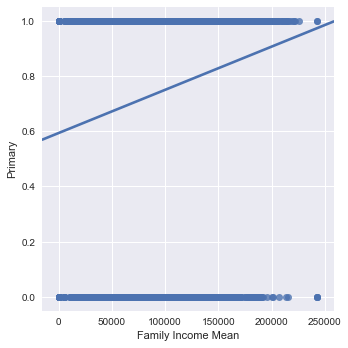

In [16]:

sns.lmplot(x = 'Family Income Mean', y ='Primary', data = ten, ci =None)

In [17]:
income_model = sm.Logit(ten['Primary'],ten['Family Income Mean']).fit()
income_model.summary()

Optimization terminated successfully.
         Current function value: 0.597934
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Primary   No. Observations:                21110
Model:                          Logit   Df Residuals:                    21109
Method:                           MLE   Df Model:                            0
Date:                Wed, 18 Oct 2017   Pseudo R-squ.:                0.008821
Time:                        22:45:43   Log-Likelihood:                -12622.
converged:                       True   LL-Null:                       -12735.
                                        LLR p-value:                       nan
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Family Income Mean   1.18e-05   2.03e-07     58.119      0.000    1.14e-05    1.22e-05
======================================================================================
"""

# Creating Testing And Training Data

In [21]:
ten1 = ten.copy()
ten1.pop('State Name')
ten1.pop('State_ab')
ten1.pop('County')
ten1.pop('City')
ten1.pop('Place')
ten1.pop('Type')

0        Track
1        Track
2        Track
3        Track
4        Track
5        Track
6        Track
7        Track
8        Track
9        Track
10       Track
11       Track
12       Track
13       Track
14       Track
15       Track
16       Track
17       Track
18       Track
19       Track
20       Track
21       Track
22       Track
23       Track
24       Track
25       Track
26       Track
27       Track
28       Track
29       Track
         ...  
21080      CDP
21081      CDP
21082      CDP
21083     City
21084      CDP
21085      CDP
21086     Town
21087      CDP
21088      CDP
21089      CDP
21090     Town
21091      CDP
21092      CDP
21093      CDP
21094     Town
21095     City
21096      CDP
21097     Town
21098      CDP
21099      CDP
21100      CDP
21101      CDP
21102     Town
21103     Town
21104      CDP
21105      CDP
21106      CDP
21107      CDP
21108     City
21109      CDP
Name: Type, Length: 21110, dtype: object

In [22]:
K = ten1.pop('Primary')

In [25]:
ten_train,ten_test,K_train,K_test = train_test_split(ten1,K,test_size=0.2, random_state=42)

In [26]:
log = LogisticRegression()
log.fit(ten_train,K_train)
log_score_train = log.score(ten_train, K_train)
print("Training score :" , log_score_train)

log_score_test = log.score(ten_test, K_test)
print("Testing score :" , log_score_test)

Training score : 0.716189009948
Testing score : 0.702036949313


In [29]:
from sklearn import metrics,cross_validation
from sklearn.cross_validation import cross_val_score
P = cross_validation.cross_val_predict(log,ten1,K,cv=10)
metrics.accuracy_score(K,P)
acc = cross_val_score(log, ten1, K, cv=10, scoring = 'accuracy')
print(acc)
print (cross_val_score(log,ten1,K,cv=10,scoring = 'accuracy').mean())


[ 0.71070076  0.69981061  0.70724775  0.71530081  0.71151113  0.71719564
  0.71577451  0.71672193  0.71421801  0.72227488]
0.713075603104


 Accuracy is 71.3